# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set up Splinter
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
import requests
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
rows = table.find('tr')
while rows:
    print(rows.text)
    rows = rows.next_sibling


id
terrestrial_date
sol
ls
month
min_temp
pressure




2
2012-08-16
10
155
6
-75.0
739.0




13
2012-08-17
11
156
6
-76.0
740.0




24
2012-08-18
12
156
6
-76.0
741.0




35
2012-08-19
13
157
6
-74.0
732.0




46
2012-08-20
14
157
6
-74.0
740.0




57
2012-08-21
15
158
6
-78.0
740.0




68
2012-08-22
16
158
6
-77.0
740.0




79
2012-08-23
17
159
6
-76.0
742.0




112
2012-08-27
21
161
6
-74.0
741.0




114
2012-08-28
22
162
6
-74.0
742.0




123
2012-08-29
23
162
6
-75.0
741.0




134
2012-08-30
24
163
6
-75.0
742.0




145
2012-08-31
25
163
6
-75.0
743.0




156
2012-09-01
26
164
6
-76.0
745.0




163
2012-09-02
27
164
6
-75.0
743.0




170
2012-09-03
28
165
6
-75.0
745.0




171
2012-09-04
29
166
6
-75.0
747.0




172
2012-09-05
30
166
6
-74.0
747.0




173
2012-09-06
31
167
6
-74.0
745.0




175
2012-09-08
33
168
6
-73.0
748.0




176
2012-09-10
34
168
6
-73.0
748.0




177
2012-09-11
35
169
6
-73.0
749.0




178
2012-09-12
36
169
6
-73.0
750.0




179
2012-09-13
37
170
6
-73.0
750

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Read in html tables into a Dataframe
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

# Select the table
mars_df = df[0]

# Rename the columns
mars_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
print(mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [8]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['min_temp'] = mars_df['min_temp'].astype(int)
mars_df['pressure'] = mars_df['pressure'].astype(int)

In [9]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int32
pressure                     int32
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?

# According to sciencedirect.com A common year would have 672 Martian days distributed into 24 months \
# of 28 days (of 4 weeks of 7 days each) ... however, the data found on static.bc-edx.com is equating months \
# to a "Martian Month" and therefore Mars only has 12 months ... I am providing code to find the largest \ 
# number in the months column

Max_number_in_month_column = mars_df['month'].max()
print(Max_number_in_month_column)

12


In [11]:
# 2. How many Martian days' worth of data are there?
num_rows = len(mars_df['sol'])
print(num_rows)

1867


In [12]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print(avg_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


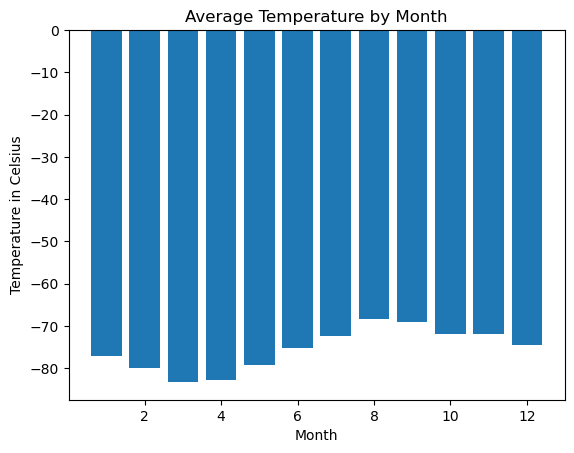

In [13]:
# Plot the average temperature by month

plt.bar(avg_low_temp_by_month.index, avg_low_temp_by_month.values)
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

plt.show()

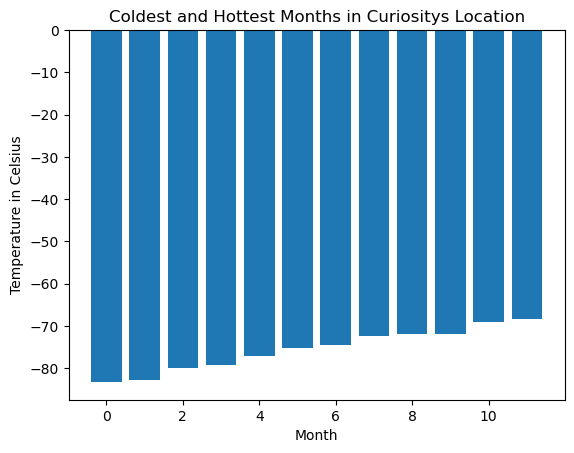

In [27]:
# Identify the coldest and hottest months in Curiosity's location

avg_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_low_temp_by_month = avg_low_temp_by_month.sort_values(ignore_index=True)
plt.bar(avg_low_temp_by_month.index, avg_low_temp_by_month.values)
plt.title('Coldest and Hottest Months in Curiositys Location')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [19]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


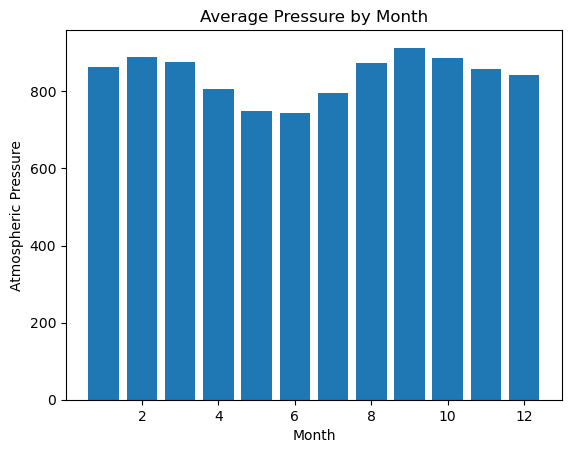

In [20]:
# Plot the average pressure by month

plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()

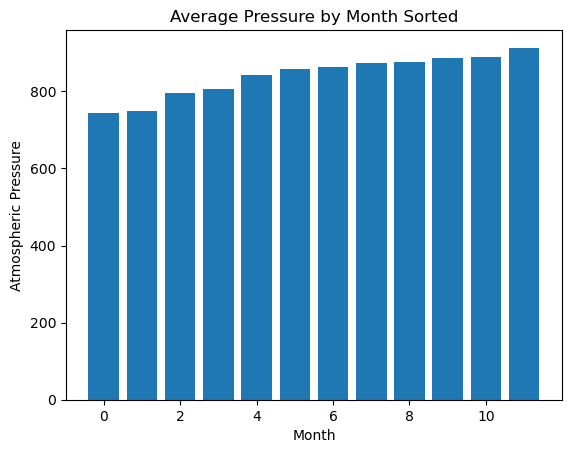

In [28]:
# Show which month, on average, has the lowest atmospheric pressure? The highest?

avg_pressure_by_month = avg_pressure_by_month.sort_values(ignore_index=True)
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.title('Average Pressure by Month Sorted')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()

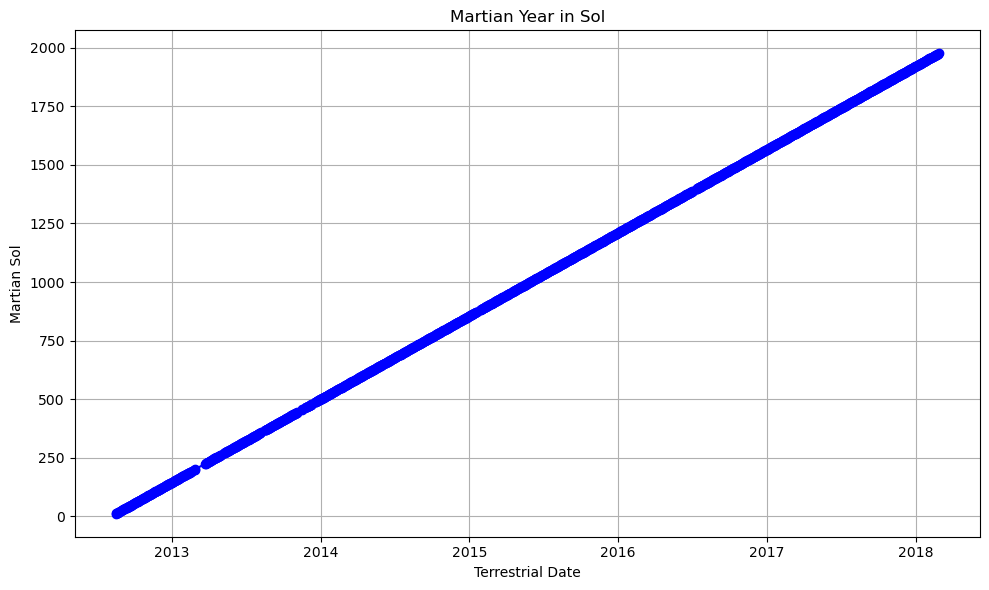

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# The starter code provided the same above question but plotted a totally different answer with minimum temperature in the \
# y column ... I was so confused.

# Calculate Martian year in sols (Martian days)
max_sol = mars_df['sol'].max()
martian_year_sols = max_sol

# Calculate Martian year in terrestrial (Earth) days
earth_days_per_sol = 24.6  # Average length of a Martian day in Earth hours
martian_year_earth_days = martian_year_sols * earth_days_per_sol

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['sol'], marker='o', linestyle='-', color='b')
plt.xlabel('Terrestrial Date')
plt.ylabel('Martian Sol')
plt.title('Martian Year in Sol')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('marsdf.csv', index=False)

In [25]:
browser.quit()